In [1]:
import matplotlib
import argparse
import os
import warnings
from code.config import WAVEFORMS_PATH, SPECTROGRAM_PATH
from code.spectrograms import async_write_spectrograms
from code.waveforms import read_waveforms
from code.filter import filter_waveforms

['AmatriceQuakes',  'OklahomaQuakes', 'CaliforniaQuakes', 'PuertoQuakes', 
'SouthAmericaQuakes']

['AmatriceQuakes',
 'OklahomaQuakes',
 'CaliforniaQuakes',
 'PuertoQuakes',
 'SouthAmericaQuakes']

In [2]:
WAVEFORMS_PATH = 'waveforms-locations/SouthAmericaQuakes'
SPECTROGRAM_PATH = 'spectrograms/SouthAmericaQuakes'

local_path = os.path.join(WAVEFORMS_PATH, "local")
local_waveforms = read_waveforms(local_path)

In [3]:
noise_path = os.path.join(WAVEFORMS_PATH, "noise")
noise_waveforms = read_waveforms(noise_path)

In [4]:
import copy
wf = copy.deepcopy(local_waveforms[90])

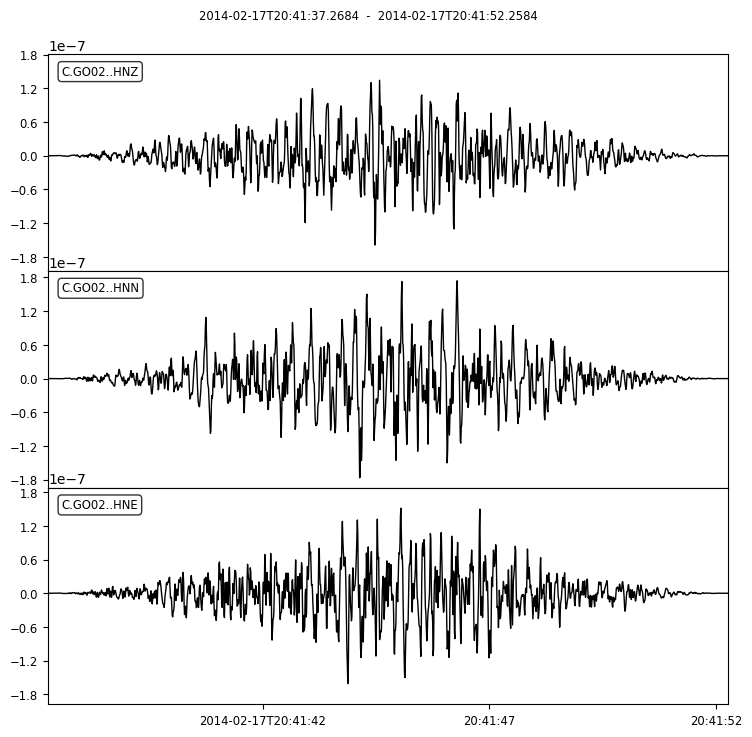

In [5]:
wf.plot()

In [6]:
local_waves = filter_waveforms([wf], pre_padding=10, post_padding=10, padding=10)

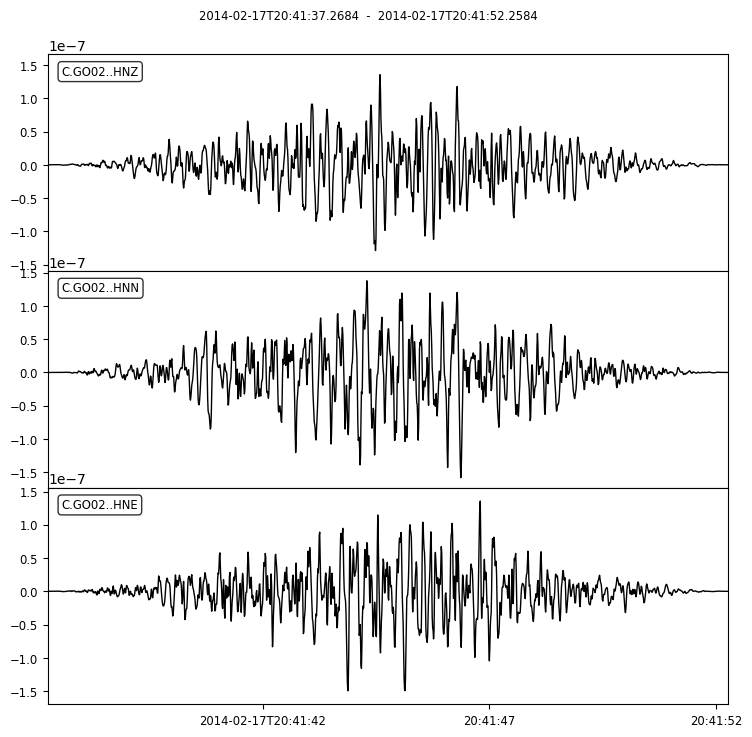

In [7]:
local_waves[0].plot()

In [8]:

def write_local():
        print("Writing local")
        local_waveforms = read_waveforms(local_path)
        local_waves = filter_waveforms(local_waveforms,
                                       pre_padding=10,
                                       post_padding=10,
                                       padding=10)
        async_write_spectrograms(local_waves, os.path.join(SPECTROGRAM_PATH, "local"))

def write_noise():
    print("Writing noise")
    noise_waveforms = read_waveforms(noise_path)
    noise_waves = filter_waveforms(noise_waveforms,
                                   pre_padding=10,
                                   post_padding=10,
                                   padding=10)
    async_write_spectrograms(noise_waves, os.path.join(SPECTROGRAM_PATH, "noise"))

In [9]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    write_local()

Writing local
Writing Files...

Wrote Files


In [10]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    write_noise()

Writing noise
Writing Files...

Wrote Files
